In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

#constants
X = 0.63 
Y = 0.35 
Z = 0.02 
gbf = 1.0005  
gff = 1.91    
guil = 9.99 
XH = 0.64
Xcno = 0.015
Mr0 = 0.0  
Lr0 = 0.0    
T0 = 1.57E7 
P0 = 2.30E16  
mh = 1.6727E-27  
kb = 1.381E-23   
G = 6.67408E-11  
r_sun = 6.957E8
m_sun = 2.0E30   
l_sun = 3.846E26 
a = 7.6565E-16   
c = 2.998E8      
e0pp = 1.08E-12   
e0cno = 8.24E-31 
u = 1.0/((2.0*X)+((3.0/4.0)*Y)+((1.0/2.0)*Z)) # mu = u
steps = 1000

def rho(y):
    Mr, Lr, T, P = y
    rho1 = (P-(a*(T**4.0)/3.0))*((u*mh)/(kb*T))
    return rho1

def eps(y):
    Mr, Lr, T, P = y
    rho0 = rho(y)                                           
    epp = e0pp*rho0*(XH**2.0)*(T/10E5)**4.0 
    ecno = e0cno*rho0*XH*Xcno*((T/10E5)**19.9)      
    eps1 = epp + ecno  
    return eps1 

def kappa(y):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    k_bf = 4.3E21*(gbf/guil)*Z*(1.0+X)*(rho0/T**3.5) 
    k_ff = 3.7E18*gff*(1.0-Z)*(1.0+X)*(rho0/T**3.5)    
    k_e = 0.02*(1.0+X)                                       
    kappa1 = ((k_bf+k_ff+k_e)/3.0)
    return kappa1

def dmdr(y, r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    dmdr1 = 4.0*np.pi*(r**2.0)*rho0
    return dmdr1

def dpdr(y, r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    dpdr1 = -G*Mr*rho0/(r**2.0)
    return dpdr1

def dldr(y, r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    eps0 = eps(y)
    dldr1 = 4.0*np.pi*(r**2.0)*rho0*eps0
    return dldr1

def dtdr(y, r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    kappa0 = kappa(y)
    dtdr1 = -(3.0/(4.0*a*c))*(kappa0*rho0/(T**3.0))*(Lr/(4.0*np.pi*(r**2.0)))
    return dtdr1

def main(y, r):
    Mr, Lr, T, P = y
    dr_system = [dmdr(y,r),dldr(y,r),dtdr(y,r),dpdr(y,r)]
    return dr_system

y0 = [Mr0, Lr0, T0, P0] 
r = np.linspace(0.1, r_sun, steps)
result = odeint(main, y0, r)

rho_results = [[rho(result[y]) for x in range(1)] for y in range(steps)]
rho_array = np.array(rho_results)
array_r = np.array(r)
dLdr_results = [[dldr(result[y],array_r[y]) for x in range(1)] for y in range(steps)]
dLdr_array = np.array(dLdr_results)

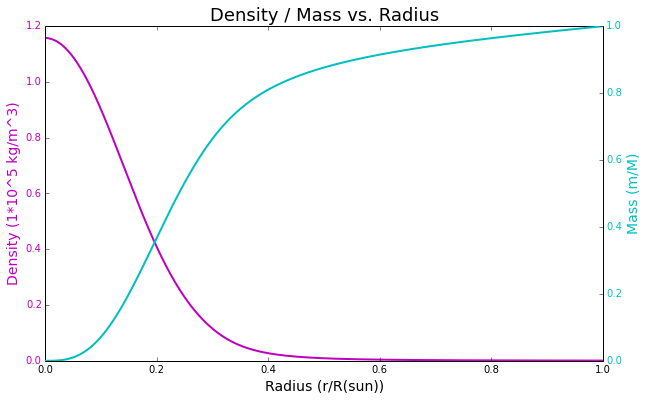

In [3]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.title('Density / Mass vs. Radius',fontsize=18)
ax1.plot(r/r_sun, rho_array/10E4, 'm', label='Density', lw=2)
ax1.set_xlabel('Radius (r/R(sun))',fontsize=14)

ax1.set_ylabel('Density (1*10^5 kg/m^3)', fontsize=14, color='m')
for tl in ax1.get_yticklabels():
    tl.set_color('m')


ax2 = ax1.twinx()
ax2.plot(r/r_sun, result[:, 0]/m_sun, 'c', label='Mass', lw=2)
ax2.set_ylabel('Mass (m/M)', fontsize=14, color='c')
for tl in ax2.get_yticklabels():
    tl.set_color('c')


plt.show()

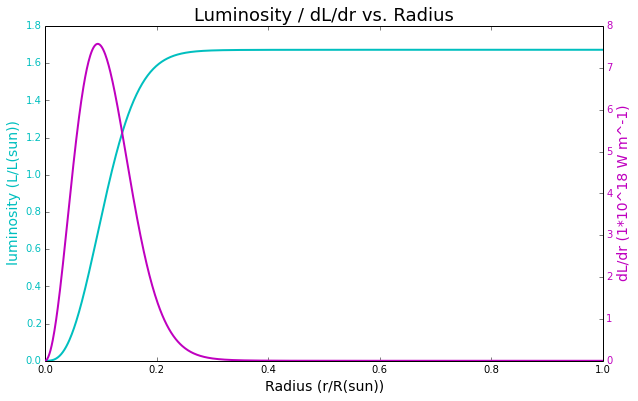

In [5]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.title('Luminosity / dL/dr vs. Radius',fontsize=18)
ax1.plot(r/r_sun, result[:, 1]/l_sun, 'c', label='Luminosity', lw=2)
ax1.set_xlabel('Radius (r/R(sun))',fontsize=14)
ax1.set_ylabel('luminosity (L/L(sun))', fontsize=14, color='c')
for tl in ax1.get_yticklabels():
    tl.set_color('c')

ax2 = ax1.twinx()
ax2.plot(r/r_sun, dLdr_array/10E17, 'm', label='Mass', lw=2)
ax2.set_ylabel('dL/dr (1*10^18 W m^-1)', fontsize=14, color='m')
for tl in ax2.get_yticklabels():
    tl.set_color('m')
    

plt.show()

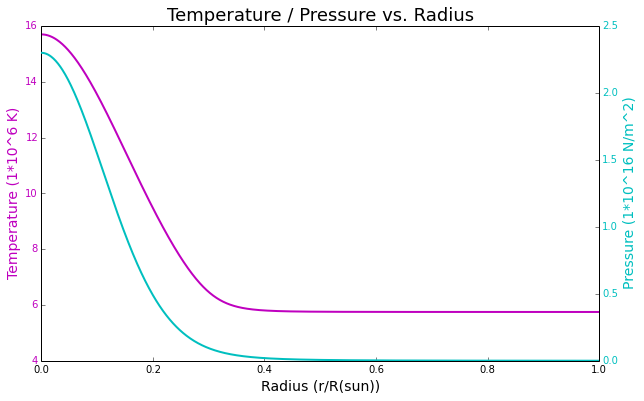

In [7]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.title('Temperature / Pressure vs. Radius',fontsize=18)
ax1.plot(r/r_sun, result[:, 2]/10E5, 'm', label='Temperature', lw=2)
ax1.set_xlabel('Radius (r/R(sun))',fontsize=14)
ax1.set_ylabel('Temperature (1*10^6 K)', fontsize=14, color='m')
for tl in ax1.get_yticklabels():
    tl.set_color('m')

ax2 = ax1.twinx()
ax2.plot(r/r_sun, result[:, 3]/10E15, 'c', label='Pressure', lw=2)
ax2.set_ylabel('Pressure (1*10^16 N/m^2)', fontsize=14, color='c')
for tl in ax2.get_yticklabels():
    tl.set_color('c')

    
plt.show()